In [59]:
import os
import pandas as pd
import graphlab as gl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [60]:
ratings_path = os.path.join('data','ratings.dat')
ratings = gl.SFrame(ratings_path, format='tsv')

Finished parsing file /Users/Trent/data_science/case_studies/joke_recommender/data/ratings.dat

Parsing completed. Parsed 100 lines in 1.19867 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Trent/data_science/case_studies/joke_recommender/data/ratings.dat

Parsing completed. Parsed 1218325 lines in 0.920995 secs.

In [61]:
ratings

user_id,joke_id,rating
34888,111,-9.71875
49651,119,4.75
29027,137,2.625
25235,30,-2.4375
50499,19,2.1875
7300,51,9.3125
30219,9,2.3125
29443,134,3.1875
27069,128,1.21875
24450,120,10.0


In [21]:
pd_ratings = pd.Series(ratings['rating'])
pd_ratings.describe()

count    1.218325e+06
mean     1.700198e+00
std      5.285761e+00
min     -1.000000e+01
25%     -1.906250e+00
50%      2.312500e+00
75%      5.812500e+00
max      1.000000e+01
dtype: float64

Jokes appear to be rated on a scale from -10 to 10. We assume -10 would be an offensive, unfunny joke, and 10 is hilarity.

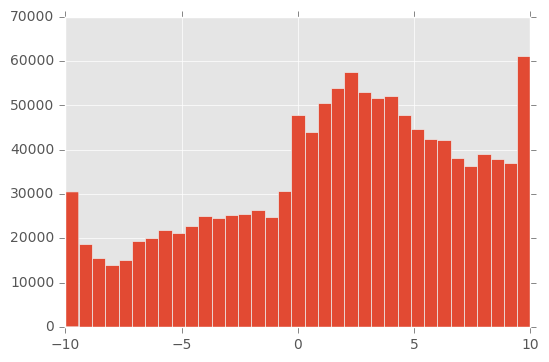

In [23]:
pd_ratings.hist(bins=35)

In [79]:
rec_engine = gl.factorization_recommender.create(observation_data=ratings,
                                                     user_id="user_id",
                                                     item_id="joke_id",
                                                     target='rating',
                                                     solver='als',
                                                     side_data_factorization=False,
                                                     regularization=0,
                                                     max_iterations=70)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 141 items.

Data prepared in: 0.830779s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 0        |

| max_iterations               | Maximum Number of Iterations                     | 70       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 100us        | NA                     |

+---------+--------------+------------------------+

| 0       | 330.478ms    | 4.08983                |

| 1       | 665.105ms    | 3.3215                 |

| 2       | 1.01s        | 3.17969                |

| 3       | 1.32s        | 3.12704                |

| 4       | 1.64s        | 3.09908                |

| 5       | 1.98s        | 3.08142                |

| 6       | 2.31s        | 3.06899                |

| 7       | 2.68s        | 3.05944                |

| 8       | 3.03s        | 3.05162                |

| 9       | 3.41s        | 3.04493                |

| 10      | 3.75s        | 3.03912                |

| 11      | 4.09s        | 3.03404                |

| 12      | 4.43s        | 3.0296                 |

| 13      | 4.77s        | 3.02571                |

| 14      | 5.10s        | 3.02226                |

| 15      | 5.43s        | 3.01919                |

| 16      | 5.78s        | 3.01643                |

| 17      | 6.14s        | 3.01394                |

| 18      | 6.50s        | 3.01168                |

| 19      | 6.84s        | 3.00961                |

| 20      | 7.18s        | 3.00771                |

| 21      | 7.52s        | 3.00596                |

| 22      | 7.87s        | 3.00433                |

| 23      | 8.22s        | 3.00281                |

| 24      | 8.57s        | 3.0014                 |

| 25      | 8.90s        | 3.00009                |

| 26      | 9.25s        | 2.99887                |

| 27      | 9.59s        | 2.99773                |

| 28      | 9.94s        | 2.99665                |

| 29      | 10.28s       | 2.99565                |

| 30      | 10.63s       | 2.9947                 |

| 31      | 10.97s       | 2.9938                 |

| 32      | 11.33s       | 2.99296                |

| 33      | 11.70s       | 2.99217                |

| 34      | 12.06s       | 2.99143                |

| 35      | 12.41s       | 2.99074                |

| 36      | 12.77s       | 2.99009                |

| 37      | 13.11s       | 2.98948                |

| 38      | 13.44s       | 2.98891                |

| 39      | 13.79s       | 2.98837                |

| 40      | 14.14s       | 2.98787                |

| 41      | 14.49s       | 2.98739                |

| 42      | 14.84s       | 2.98693                |

| 43      | 15.19s       | 2.9865                 |

| 44      | 15.54s       | 2.98609                |

| 45      | 15.92s       | 2.9857                 |

| 46      | 16.28s       | 2.98533                |

| 47      | 16.64s       | 2.98499                |

| 48      | 16.97s       | 2.98466                |

| 49      | 17.32s       | 2.98436                |

| 50      | 17.67s       | 2.98406                |

| 51      | 18.00s       | 2.98379                |

| 52      | 18.34s       | 2.98352                |

| 53      | 18.67s       | 2.98327                |

| 54      | 19.02s       | 2.98304                |

| 55      | 19.36s       | 2.98281                |

| 56      | 19.70s       | 2.9826                 |

| 57      | 20.03s       | 2.98239                |

| 58      | 20.37s       | 2.98219                |

| 59      | 20.71s       | 2.982                  |

| 60      | 21.06s       | 2.98182                |

| 61      | 21.40s       | 2.98164                |

| 62      | 21.73s       | 2.98147                |

| 63      | 22.07s       | 2.98131                |

| 64      | 22.42s       | 2.98115                |

| 65      | 22.76s       | 2.981                  |

| 66      | 23.10s       | 2.98086                |

| 67      | 23.44s       | 2.98072                |

| 68      | 23.79s       | 2.98058                |

| 69      | 24.13s       | 2.98045                |

| FINAL   | 24.13s       | 2.98045                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [62]:
predictions = rec_engine.predict(ratings)

In [63]:
predictions
print predictions.max(), predictions.min()

18.8484086459 -21.7984419401


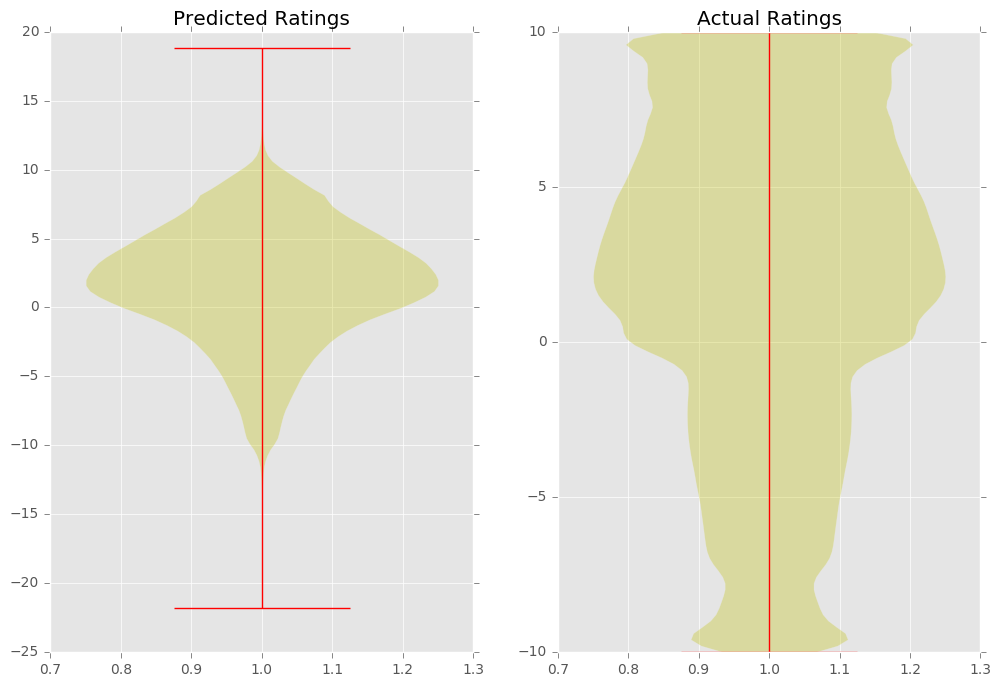

In [65]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax1.violinplot(predictions)
ax1.set_title('Predicted Ratings')
ax2 = fig.add_subplot(1,2,2)
ax2.violinplot(pd_ratings)
ax2.set_title('Actual Ratings')